# 03 Q-agent hyperparameters analysis

#### 👉RL agents are extremely sensitive to hyper-parameters.

#### 👉In the previous notebook you trusted me when I set them, but in reality you will need to tune them yourself.

#### 👉Let's play with them in a systematic way to gain a better intuition of how they impact learning.

In [6]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\Admin\Documents\hands-on-rl\.conda\Lib\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Environment 🌎

In [7]:
import gymnasium as gym
env = gym.make("Taxi-v3", render_mode="ansi", max_episode_steps=-1)

## Q-agent 🤖🧠

In [8]:
# Make sure the current working directory is in the python path.
# This is so that the notebook can find the `src` module.
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


# No need to copy paste the same QAgent
# definition in every notebook, don't you think?
from src.q_agent import QAgent

# hyper-parameters
# RL problems are full of these hyper-parameters.
# For the moment, trust me when I set these values.
# We will later play with these and see how they impact learning.
alphas = [0.01, 0.1, 1]
gammas = [0.1, 0.6, 0.9]

## Training loop 🎡

In [9]:
import pandas as pd

from src.loops import train

# exploration vs exploitation prob
# let's start with a constant probability of 10%.
epsilon = 0.1
n_episodes = 1000

results = pd.DataFrame()
for alpha in alphas:
    for gamma in gammas:
        
        print(f'alpha: {alpha}, gamma: {gamma}')
        agent = QAgent(env, alpha, gamma)
        
        _, timesteps, penalties = train(agent,
                                        env,
                                        n_episodes,
                                        epsilon)
        
        # collect timesteps and penalties for this pair
        # of hyper-parameters (alpha, gamma)
        results_ = pd.DataFrame()
        results_['timesteps'] = timesteps
        results_['penalties'] = penalties
        results_['alpha'] = alpha
        results_['gamma'] = gamma
        results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(
    columns={'index': 'episode'})

# add column with the 2 hyper-parameters
results['hyperparameters'] = [
    f'alpha={a}, gamma={g}'
    for (a, g) in zip(results['alpha'], results['gamma'])
]

alpha: 0.01, gamma: 0.1


100%|██████████| 1000/1000 [00:06<00:00, 146.91it/s]


alpha: 0.01, gamma: 0.6


100%|██████████| 1000/1000 [00:03<00:00, 260.48it/s]


alpha: 0.01, gamma: 0.9


100%|██████████| 1000/1000 [00:03<00:00, 319.74it/s]


alpha: 0.1, gamma: 0.1


100%|██████████| 1000/1000 [00:02<00:00, 446.13it/s]


alpha: 0.1, gamma: 0.6


100%|██████████| 1000/1000 [00:00<00:00, 1007.53it/s]


alpha: 0.1, gamma: 0.9


100%|██████████| 1000/1000 [00:00<00:00, 1295.13it/s]


alpha: 1, gamma: 0.1


100%|██████████| 1000/1000 [00:00<00:00, 3586.33it/s]


alpha: 1, gamma: 0.6


100%|██████████| 1000/1000 [00:00<00:00, 3836.95it/s]


alpha: 1, gamma: 0.9


100%|██████████| 1000/1000 [00:00<00:00, 3819.76it/s]


<Axes: xlabel='episode', ylabel='timesteps'>

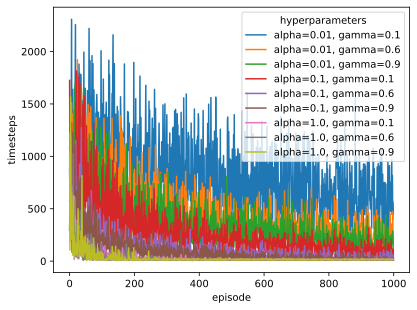

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.gcf()
sns.lineplot(results, x='episode', y='timesteps',
            hue='hyperparameters')

## That looks cool! 😎 But a bit too noisy... 😵‍💫
## What about averaging over several runs?

In [11]:
from src.loops import train_many_runs

alphas = [0.1, 1]
gammas = [0.1, 0.6, 0.9]

epsilon = 0.1
n_episodes = 1000
n_runs = 10

results = pd.DataFrame()
for alpha in alphas:
    for gamma in gammas:
        
        print(f'alpha: {alpha}, gamma: {gamma}')
        agent = QAgent(env, alpha, gamma)
        
        timesteps, penalties = train_many_runs(agent,
                                               env,
                                               n_episodes,
                                               epsilon,
                                               n_runs)
        
        # collect timesteps and penalties for this pair of
        # hyper-parameters (alpha, gamma)
        results_ = pd.DataFrame()
        results_['timesteps'] = timesteps
        results_['penalties'] = penalties
        results_['alpha'] = alpha
        results_['gamma'] = gamma
        results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(
    columns={'index': 'episode'})

results['hyperparameters'] = [
    f'alpha={a}, gamma={g}'
    for (a, g) in zip(results['alpha'], results['gamma'])]

alpha: 0.1, gamma: 0.1


100%|██████████| 1000/1000 [00:02<00:00, 441.15it/s]


alpha: 0.1, gamma: 0.6


100%|██████████| 1000/1000 [00:01<00:00, 995.22it/s]


alpha: 0.1, gamma: 0.9


100%|██████████| 1000/1000 [00:00<00:00, 1320.68it/s]


alpha: 1, gamma: 0.1


100%|██████████| 1000/1000 [00:00<00:00, 3602.79it/s]


alpha: 1, gamma: 0.6


100%|██████████| 1000/1000 [00:00<00:00, 3713.38it/s]


alpha: 1, gamma: 0.9


100%|██████████| 1000/1000 [00:00<00:00, 3646.62it/s]


<Axes: xlabel='episode', ylabel='timesteps'>

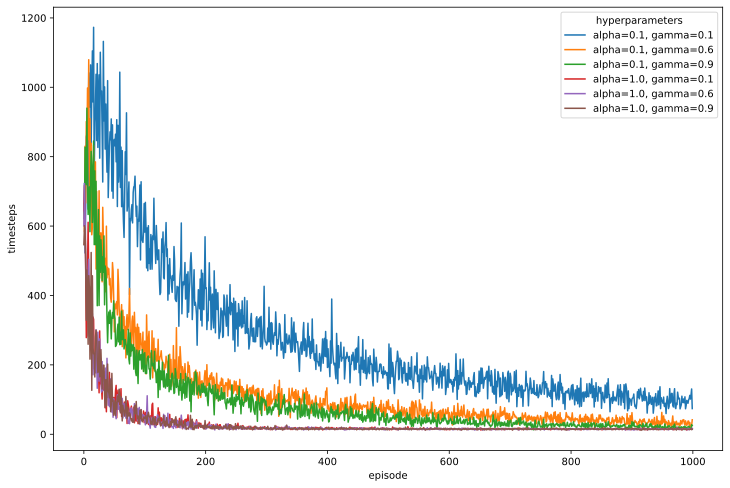

In [12]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot(results, x='episode', y='timesteps', hue='hyperparameters')

## Nice one!

## What about `epsilon`? Is the current value of 10% the best?

In [13]:
# best hyper-parameters so far
alpha = 1.0
gamma = 0.9

epsilons = [0.01, 0.10, 0.9]
n_runs = 10
n_episodes = 200

results = pd.DataFrame()
for epsilon in epsilons:
        
    print(f'epsilon: {epsilon}')
    agent = QAgent(env, alpha, gamma)

    timesteps, penalties = train_many_runs(agent,
                                           env,
                                           n_episodes,
                                           epsilon,
                                           n_runs)

    # collect timesteps and penalties for this pair of
    # hyper-parameters (alpha, gamma)
    results_ = pd.DataFrame()
    results_['timesteps'] = timesteps
    results_['penalties'] = penalties
    results_['epsilon'] = epsilon
    results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(columns={'index': 'episode'})

epsilon: 0.01


100%|██████████| 200/200 [00:00<00:00, 1189.11it/s]


epsilon: 0.1


100%|██████████| 200/200 [00:00<00:00, 1201.03it/s]


epsilon: 0.9


100%|██████████| 200/200 [00:00<00:00, 331.01it/s]


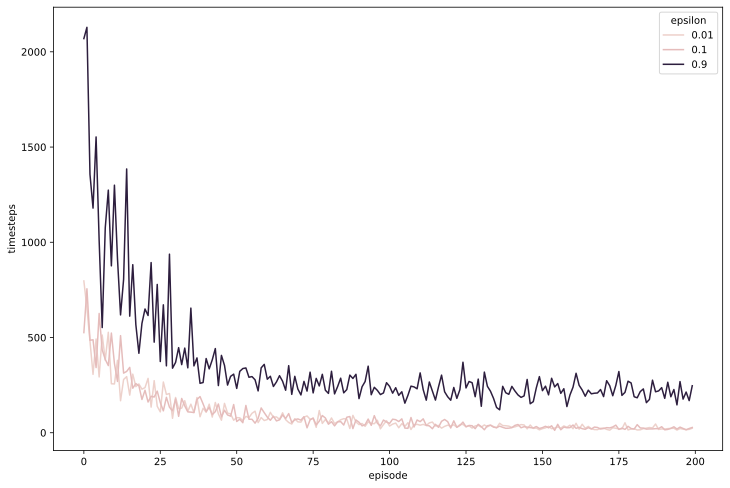

<Axes: xlabel='episode', ylabel='penalties'>

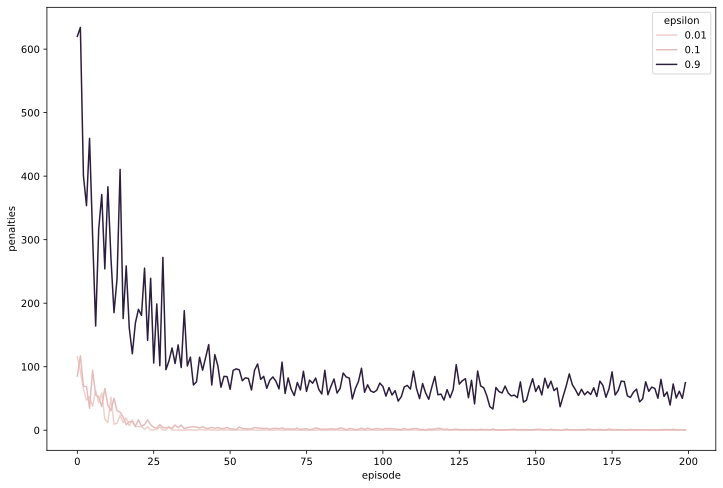

In [14]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot(results, x='episode', y='timesteps', hue='epsilon')
plt.show()

fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot(results, x='episode', y='penalties', hue='epsilon')